<a href="https://colab.research.google.com/github/cecilia-wanja/Football-prediction-scores/blob/master/Independent_project_week6_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QUESTION
Being a football analyst in a company - Mchezopesa Ltd you are tasked to accomplish the task below:

A Prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

In [0]:
import pandas as pd
#allows us to organize data in tabular form
import numpy as np
#numpy allows us to work with multi dimensional arrays
import scipy
#scipy-a python ecosystem used for mathematics, machine learning 
import matplotlib.pyplot as plt
#matplotlib-a 2D library for plotting numpy computations
import seaborn as sns
#seaborn-a python visualization based on matplotlib, helps in drawing attractive statistical graphics
import sklearn
#sklearn-used for machine learning, 
%matplotlib inline
#for visualization 
import statsmodels.api as sm
#statsmodel-used to run regression

### METRICS OF SUCCESS
1. Getting the model with the highest accuracy level.
2. 

# CONTEXT


In [0]:
#loading my dataset
football = pd.read_csv("results.csv")

In [331]:
#looking at our first few rows
football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [332]:
data2 = pd.read_csv("/content/fifa_ranking.csv")
data2.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [333]:
#looking at both datasets number of rows and columns
data2.shape               

(57793, 16)

In [334]:
football.shape

(40839, 9)

In [0]:
#concating or merging both datasets for ease of use
 newfootball = pd.concat([football, data2],axis = 1)

In [336]:
#looking at the newly concated dataframe
newfootball.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [337]:
#looking at the number of rows and columns
newfootball.shape


(57793, 25)

In [338]:
#useful statistics about our dataset
newfootball.describe()

,home_score,away_score,rank,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,40839.000000,40839.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000,57793.000000
mean,1.745709,1.188105,101.628086,122.068637,332.302926,-0.009897,61.798602,61.798602,61.004602,30.502377,59.777462,17.933277,59.173916,11.834811
std,1.749145,1.405120,58.618424,260.426863,302.872948,5.804309,138.014883,138.014883,137.688204,68.844143,136.296079,40.888849,135.533343,27.106675
min,0.000000,0.000000,1.000000,0.000000,0.000000,-72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,51.000000,0.000000,56.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,101.000000,0.000000,272.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,152.000000,92.790000,525.000000,1.000000,32.250000,32.250000,26.660000,13.330000,21.500000,6.450000,21.250000,4.250000
max,31.000000,21.000000,209.000000,1775.030000,1920.000000,92.000000,1158.660000,1158.660000,1169.570000,584.790000,1159.710000,347.910000,1200.770000,240.150000


In [339]:
#the datatypes of each column
newfootball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 25 columns):
date                       40839 non-null object
home_team                  40839 non-null object
away_team                  40839 non-null object
home_score                 40839 non-null float64
away_score                 40839 non-null float64
tournament                 40839 non-null object
city                       40839 non-null object
country                    40839 non-null object
neutral                    40839 non-null object
rank                       57793 non-null int64
country_full               57793 non-null object
country_abrv               57793 non-null object
total_points               57793 non-null float64
previous_points            57793 non-null int64
rank_change                57793 non-null int64
cur_year_avg               57793 non-null float64
cur_year_avg_weighted      57793 non-null float64
last_year_avg              57793 non-null float64
last_y

In [340]:
football = newfootball.loc[:40838]
football.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
40834,2019-07-18,American Samoa,Tahiti,8.0,1.0,Pacific Games,Apia,Samoa,True,42,IR Iran,IRN,625.73,576,8,385.24,385.24,239.17,119.58,205.49,61.65,296.30,59.26,AFC,2011-10-19
40835,2019-07-18,Fiji,Solomon Islands,4.0,4.0,Pacific Games,Apia,Samoa,True,44,Nigeria,NGA,624.77,613,-1,256.15,256.15,363.51,181.76,335.93,100.78,430.39,86.08,CAF,2011-10-19
40836,2019-07-19,Senegal,Algeria,0.0,1.0,African Cup of Nations,Cairo,Egypt,True,45,Wales,WAL,618.79,374,45,468.33,468.33,101.57,50.79,158.40,47.52,260.73,52.15,UEFA,2011-10-19
40837,2019-07-19,Tajikistan,North Korea,0.0,1.0,Intercontinental Cup,Ahmedabad,India,True,46,Armenia,ARM,607.91,610,-2,367.81,367.81,340.59,170.30,163.50,49.05,103.75,20.75,UEFA,2011-10-19
40838,2019-07-20,Papua New Guinea,Fiji,1.0,1.0,Pacific Games,Apia,Samoa,True,47,Cameroon,CMR,599.98,596,1,239.19,239.19,216.18,108.09,454.18,136.25,582.25,116.45,CAF,2011-10-19


In [341]:
football.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [342]:
football.shape

(40839, 25)

# REGRESSION

In [0]:
#our first regression
#defining our dependent variables and our independent variables.
#this concerns a prediction result between team 1 and team 2.
y = football[['home_score','away_score']]
x = football[['home_team','away_team','tournament','rank']]


**Visualization**

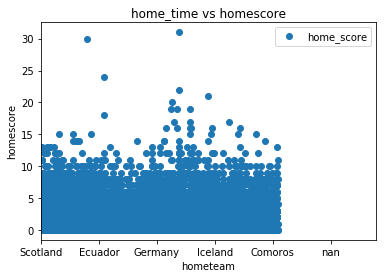

In [344]:
newfootball.plot(x = 'home_team',y ='home_score',style = 'o')
plt.xlabel('hometeam')
plt.ylabel('homescore')
plt.title('home_time vs homescore')
plt.show()

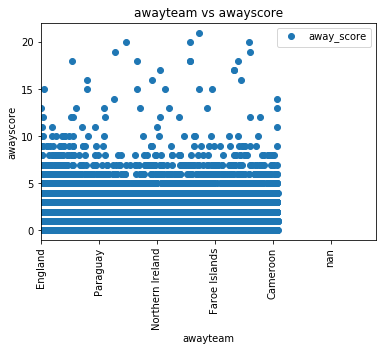

In [345]:
newfootball.plot(x = 'away_team', y = 'away_score',style = 'o')
plt.xlabel('awayteam')
plt.xticks(rotation=90)
plt.ylabel('awayscore')
plt.title('awayteam vs awayscore')
plt.show()


**Linear regression**

From the scatter plot, the data does not appear to be linear. So if were to fit a simple linear straight line, it would not cover most of the points. Which is why applying Linear regression on this dataset would not give us the correct value.

The other alternative we are left with is applying polynomial regression.

In [0]:
#for predicting a response using a single feature. 
#It is assumed that the two variables are linearly related.
#hence we will not use linear regression since we are dealing with more than one dependent and independent variables.

In [0]:
#getting dummy variables for each categorical column
#recalling that:y = newfootball[['home_score','away_score']]
#x = newfootball[['home_team','away_team','tournament','city','country','neutral']]
#therefore:



In [347]:
x.isnull().any().sum()

0

In [348]:
y.isnull().any().sum()

0

In [0]:
x = x.apply(pd.to_numeric, errors='coerce').fillna(0, downcast='infer')
y = y.apply(pd.to_numeric, errors='coerce')

In [350]:
x.tail()

,home_team,away_team,tournament,rank
40834,0,0,0,42
40835,0,0,0,44
40836,0,0,0,45
40837,0,0,0,46
40838,0,0,0,47


In [351]:
y.tail()

,home_score,away_score
40834,8.0,1.0
40835,4.0,4.0
40836,0.0,1.0
40837,0.0,1.0
40838,1.0,1.0


In [0]:
#splitting the dataset into train and test set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 0)

In [353]:
#fitting into a linear regression
from sklearn.linear_model import LinearRegression
reg_line = LinearRegression()
reg_line.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#finding the most optimal coefficients for all the attributes. 
# To see what coefficients our regression model has chosen, we execute the following
# 
coeff = pd.DataFrame(reg_line.coef_, x.columns, columns=['Coefficient'])
coeff


In [356]:
#making predictions
y_pred = reg_line.predict(x_test )
y_pred

array([[1.74246874, 1.18547338],
       [1.75588423, 1.20300322],
       [1.74662115, 1.19089928],
       ...,
       [1.72010958, 1.15625699],
       [1.72298433, 1.16001338],
       [1.76195315, 1.21093338]])

In [357]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
rms

1.5720196632144807

indicates the absolute fit of the model to the data–how close the observed data points are to the model’s predicted values.

In [362]:
# Predict using linear regression
lin_pred = reg_line.predict([[6.5]])
print('Linear prediction: %d' %lin_pred)


ValueError: ignored

**Polynomial regression**

In [0]:
#splitting the dataset into train and test set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state = 0)

In [359]:
#looking at the train and test sets number of rows and columns
print("x_train shape",x_train.shape)
print('x_test shape', x_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

x_train shape (32671, 4)
x_test shape (8168, 4)
y_train shape (32671, 2)
y_test shape (8168, 2)


In [0]:
#fitting into a polynomial regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) 
x_poly = poly_reg.fit_transform(x)

In [361]:
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [364]:
# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[6.5]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg.fit_transform(x))

ValueError: ignored